<a href="https://colab.research.google.com/github/Teopx/UTFPR/blob/main/EXERCICIO_3_APREND_SUPERV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCÍCIO AULA 3 - ENSEMBLE LEARNING

**Discente:**Cléber Fernando Paixão

**Objetivo:** Desenvolver um pipeline completo de aprendizado supervisionado utilizando ensemble learning para resolver um problema de regressão utilizando o dataset diabetes ou california_housing do scikit-learn.

**Descrição do Problema:** Utilize ao menos três tipos diferentes de ensemble learning

**Tarefa:**
 Implemente um pipeline de aprendizado de máquina que:

 1. Carregue e prepare o dataset de regressão diabetes ou california_housing.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [14]:
# Importando o arquivo California Housing por sklearn:
housing = fetch_california_housing()
X, y = housing.data, housing.target
print("carregando dataset!")

carregando dataset!


In [10]:
# Normalizar dados:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Formandoo os dados de entrada (X): {X_scaled.shape}")
print(f"Formando os rótulos (y): {y.shape}")

Formandoo os dados de entrada (X): (20640, 8)
Formando os rótulos (y): (20640,)


2. Divida os dados em treino e teste.

In [15]:
# Dividindo os dados em "Treino" e "Teste"
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Totalizaçaõ dos dados de treino: {X_train.shape[0]}")
print(f"Totalização dos dados de teste: {X_test.shape[0]}")

# Definir a validação cruzada (diferentes combinações)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dicionário dos melhores estimadores e seus resultados
best_estimators = {}

Totalizaçaõ dos dados de treino: 16512
Totalização dos dados de teste: 4128


3. Utilize um conjunto de modelos de regressão *(ex: RandomForestRegressor, SVR, Ridge, GradientBoostingRegressor).*

4. Para cada modelo: ○ Defina um conjunto de hiperparâmetros a serem otimizados. ○ Use GridSearchCV com validação cruzada (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros.

In [16]:
# RandomForestRegressor com GridSearchCV para fazer a validação cruzada usando o (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros.:
print("\nOtimização")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': [0.6, 0.8],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_estimators['RandomForest'] = grid_search_rf.best_estimator_
print(f"Seleção dos melhores hiperparâmetros RandomForest: {grid_search_rf.best_params_}")
print(f"Melhor treino selecionado para RandomForest: {-grid_search_rf.best_score_:.4f}")


Otimização
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Seleção dos melhores hiperparâmetros RandomForest: {'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 200}
Melhor treino selecionado para RandomForest: 0.2491


In [17]:
# SVR com GridSearchCV para fazer a validação cruzada usando o (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros.:
print("\nOtimização")
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}
svr = SVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train, y_train)
best_estimators['SVR'] = grid_search_svr.best_estimator_
print(f"Seleção dos melhores hiperparâmetros SVR: {grid_search_svr.best_params_}")
print(f"Melhor treino selecionado para  SVR: {-grid_search_svr.best_score_:.4f}")



Otimização
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Seleção dos melhores hiperparâmetros SVR: {'C': 10, 'epsilon': 0.1}
Melhor treino selecionado para  SVR: 0.3214


In [18]:
# Ridge com GridSearchCV para fazer a validação cruzada usando o (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros.:
print("\nOtimização")
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0]
}
ridge = Ridge(random_state=42)
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_ridge.fit(X_train, y_train)
best_estimators['Ridge'] = grid_search_ridge.best_estimator_
print(f"Seleção dos melhores hiperparâmetros  Ridge: {grid_search_ridge.best_params_}")
print(f"Melhor treino selecionado para Ridge: {-grid_search_ridge.best_score_:.4f}")




Otimização
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Seleção dos melhores hiperparâmetros  Ridge: {'alpha': 1.0}
Melhor treino selecionado para Ridge: 0.5193


In [19]:
# GradientBoostingRegressor com GridSearchCV para fazer a validação cruzada usando o (K-Fold com n_splits=5) para encontrar os melhores hiperparâmetros.:
print("\nOtimização")
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_gbr.fit(X_train, y_train)
best_estimators['GradientBoosting'] = grid_search_gbr.best_estimator_
print(f"Seleção dos melhores hiperparâmetros GradientBoosting: {grid_search_gbr.best_params_}")
print(f"Melhor treino selecionado para GradientBoosting: {-grid_search_gbr.best_score_:.4f}")




Otimização
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Seleção dos melhores hiperparâmetros GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor treino selecionado para GradientBoosting: 0.2258


5. Aplicando o *Ensemble Learning* com as três técnicas: *voting*, *bagging* e *stacking*

In [20]:
print("\nIncorporando ao código fonte o Ensemble Learning")

# Seleção dos modelos base utilizados:
rf_model = best_estimators['RandomForest']
svr_model = best_estimators['SVR']
ridge_model = best_estimators['Ridge']
gbr_model = best_estimators['GradientBoosting'] # Novo modelo otimizado

# Técnica: Voting Regressor com os 4 modelos:
print("\nTreinando o VotingRegressor")
voting_reg = VotingRegressor(
    estimators=[('rf', rf_model), ('svr', svr_model), ('ridge', ridge_model), ('gbr', gbr_model)],
    n_jobs=-1
)
voting_reg.fit(X_train, y_train)
print("Treino do VotingRegressor finalizado!")

# Bagging Regressor (usando RandomForest como estimador base)
print("\nTreinando o BaggingRegressor com o RandomForest")
bagging_reg = BaggingRegressor(
    estimator=rf_model, # com o RandomForest otimizado
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    random_state=42,
    n_jobs=-1
)
bagging_reg.fit(X_train, y_train)
print("Treino do BaggingRegressor finalizado!")

# Stacking Regressor (agora com 4 modelos no estágio 0)
print("\nTreinando o StackingRegressor")
# O meta-modelo pode ser qualquer regressor, por exemplo, um Ridge ou RandomForest
stacking_reg = StackingRegressor(
    estimators=[('rf', rf_model), ('svr', svr_model), ('ridge', ridge_model), ('gbr', gbr_model)],
    final_estimator=Ridge(random_state=42), # Meta-modelo
    cv=cv,
    n_jobs=-1
)
stacking_reg.fit(X_train, y_train)
print("Treino do StackingRegressor finalizado!")


Incorporando ao código fonte o Ensemble Learning

Treinando o VotingRegressor
Treino do VotingRegressor finalizado!

Treinando o BaggingRegressor com o RandomForest!
Treino do BaggingRegressor finalizado!

Treinando o StackingRegressor


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Treino do StackingRegressor finalizado!


6. Avalie numericamente e/ou graficamente o desempenho das três técnicas de ensemble learning para o problema de regressão.

7. Dica: você pode avaliar o erro do regressor utilizando o erro quadrático médio normalizado. Para isso basta dividir o RMSE pela variância dos rótulos do dataset.

In [21]:
print("\nAvaliação de desempenho dos modelos Ensemble learning:")

def calculate_nrmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    variance = np.var(y_true)
    if variance == 0:
        return float('inf')
    nrmse = rmse / np.sqrt(variance)
    return nrmse

# Processando e avaliando o Voting Regressor:
y_pred_voting = voting_reg.predict(X_test)
rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred_voting))
nrmse_voting = calculate_nrmse(y_test, y_pred_voting)
print(f"\n--- Resultados VotingRegressor ---")
print(f"RMSE: {rmse_voting:.4f}")
print(f"NRMSE: {nrmse_voting:.4f}")

# Processando e avaliando o Bagging Regressor:
y_pred_bagging = bagging_reg.predict(X_test)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
nrmse_bagging = calculate_nrmse(y_test, y_pred_bagging)
print(f"\n--- Resultados BaggingRegressor ---")
print(f"RMSE: {rmse_bagging:.4f}")
print(f"NRMSE: {nrmse_bagging:.4f}")

# Processando e avaliando o Stacking Regressor:
y_pred_stacking = stacking_reg.predict(X_test)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
nrmse_stacking = calculate_nrmse(y_test, y_pred_stacking)
print(f"\n--- Resultados StackingRegressor ---")
print(f"RMSE: {rmse_stacking:.4f}")
print(f"NRMSE: {nrmse_stacking:.4f}")


Avaliação de desempenho dos modelos Ensemble learning:

--- Resultados VotingRegressor ---
RMSE: 0.5241
NRMSE: 0.4579

--- Resultados BaggingRegressor ---
RMSE: 0.5084
NRMSE: 0.4441

--- Resultados StackingRegressor ---
RMSE: 0.4691
NRMSE: 0.4098


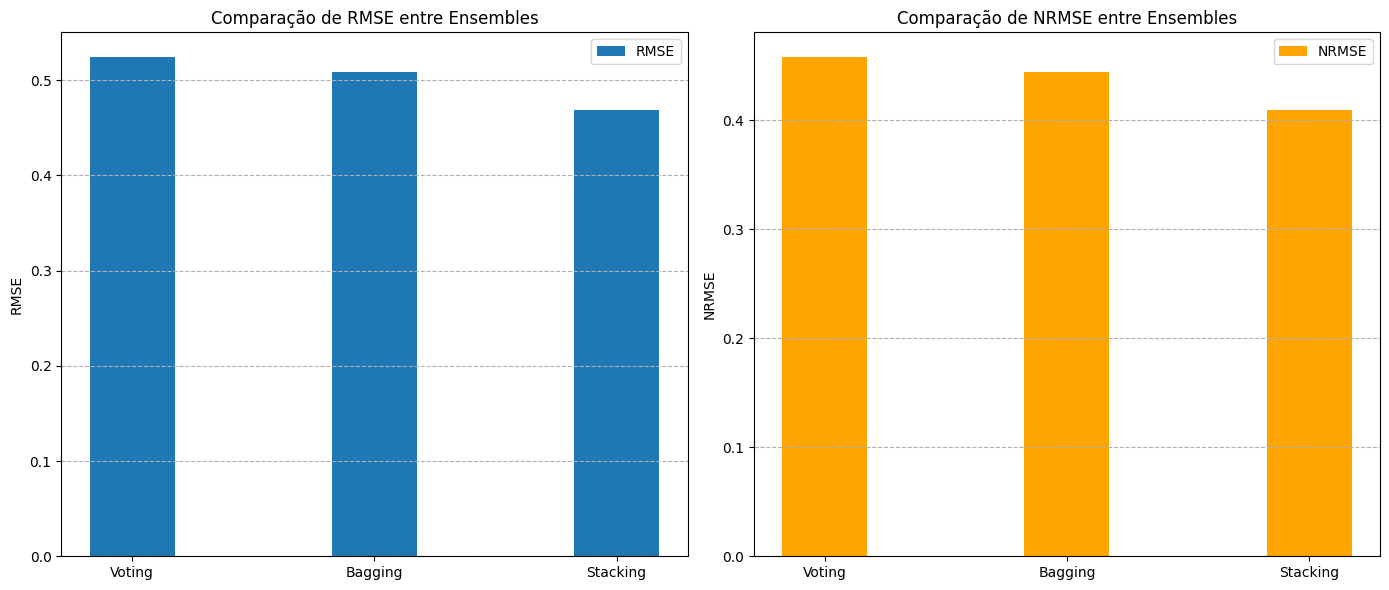


Resultado de desempenho dos modelos usados como base no conjunto de teste:
RandomForest - RMSE: 0.4971, NRMSE: 0.4343
SVR - RMSE: 0.5672, NRMSE: 0.4955
Ridge - RMSE: 0.7456, NRMSE: 0.6513
GradientBoosting - RMSE: 0.4736, NRMSE: 0.4137


In [22]:
# Demonstração gráfica dos resultados comparados:
labels = ['Voting', 'Bagging', 'Stacking']
rmse_values = [rmse_voting, rmse_bagging, rmse_stacking]
nrmse_values = [nrmse_voting, nrmse_bagging, nrmse_stacking]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico [RMSE]
rects1 = ax[0].bar(x, rmse_values, width, label='RMSE')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Comparação de RMSE entre Ensembles')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--')

# Gráfico [NRMSE]
rects2 = ax[1].bar(x, nrmse_values, width, label='NRMSE', color='orange')
ax[1].set_ylabel('NRMSE')
ax[1].set_title('Comparação de NRMSE entre Ensembles')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("\nResultado de desempenho dos modelos usados como base no conjunto de teste:")
for name, estimator in best_estimators.items():
    y_pred_base = estimator.predict(X_test)
    rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
    nrmse_base = calculate_nrmse(y_test, y_pred_base)
    print(f"{name} - RMSE: {rmse_base:.4f}, NRMSE: {nrmse_base:.4f}")